# Preparations and training

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [218]:
wine = load_wine()
x = wine.data
y = wine.target


In [219]:
x_train, x_test, y_train, y = train_test_split(x, y, test_size=0.2, random_state=42)

In [220]:
models = (
    {'model': RandomForestClassifier()},
    {'model': GradientBoostingClassifier()},
    {'model': LogisticRegression(max_iter=2500)},
    {'model': SVC(probability=True)},
)


In [221]:
for model in models:
    curr = model.get('model') 
    curr.fit(x_train, y_train)
    y_pred = curr.predict(x_test)
    model['accuracy'] = accuracy_score(y, y_pred)
    model['predictions'] = curr.predict_proba(x)
    print(f'model: {curr}, accuracy: {model.get("accuracy")}' )
    
# I know, that lbfgs failed to converge, but when accuracy is not 1.0, it is more interesting.

model: RandomForestClassifier(), accuracy: 1.0
model: GradientBoostingClassifier(), accuracy: 0.9444444444444444
model: LogisticRegression(max_iter=2500), accuracy: 1.0
model: SVC(probability=True), accuracy: 0.8055555555555556


c:\Users\szcze\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [222]:
predictions = []
for model in models:
  predictions.append([model.get('accuracy') * i for i in model.get('predictions')])

In [223]:
predictions

[[array([1., 0., 0.]),
  array([1., 0., 0.]),
  array([0.99, 0.01, 0.  ]),
  array([0.98, 0.01, 0.01]),
  array([0.9, 0.1, 0. ]),
  array([1., 0., 0.]),
  array([1., 0., 0.]),
  array([0.98, 0.02, 0.  ]),
  array([1., 0., 0.]),
  array([0.96, 0.04, 0.  ]),
  array([0.97, 0.03, 0.  ]),
  array([0.91, 0.08, 0.01]),
  array([0.87, 0.12, 0.01]),
  array([0.98, 0.02, 0.  ]),
  array([1., 0., 0.]),
  array([0.99, 0.  , 0.01]),
  array([0.97, 0.02, 0.01]),
  array([0.96, 0.02, 0.02]),
  array([0.97, 0.02, 0.01]),
  array([0.97, 0.02, 0.01]),
  array([0.99, 0.01, 0.  ]),
  array([0.91, 0.07, 0.02]),
  array([0.94, 0.06, 0.  ]),
  array([0.91, 0.09, 0.  ]),
  array([0.73, 0.27, 0.  ]),
  array([0.83, 0.17, 0.  ]),
  array([0.98, 0.02, 0.  ]),
  array([0.94, 0.06, 0.  ]),
  array([0.99, 0.01, 0.  ]),
  array([0.99, 0.01, 0.  ]),
  array([0.87, 0.09, 0.04]),
  array([0.99, 0.01, 0.  ]),
  array([0.9 , 0.08, 0.02]),
  array([0.97, 0.01, 0.02]),
  array([0.98, 0.02, 0.  ]),
  array([0.97, 0.02, 0.0

# Soft voting 

In [224]:
accuracy_sum = sum(model['accuracy'] for model in models)

In [225]:
final = [[sum(elements)/accuracy_sum for elements in zip(*inner_lists)] for inner_lists in zip(*predictions)]
accuracy_score(y, np.argmax(final, axis=1))

1.0

# Confidence Plots

In [231]:
def plot_confidence(proba, y, class_names):
    n_classes = len(class_names)
    
    for i in range(len(proba)):
        plot.figure(figsize=(8, 4))
        plot.bar(range(n_classes), proba[i], color='blue', alpha=0.6)
        plot.xticks(range(n_classes), class_names)
        plot.title(f'Probability for probe no. {i}\nTrue value: {class_names[y[i]]}')
        plot.xlabel('Class')
        plot.ylabel('Probability')
        plot.show()

In [227]:
class_names = wine.target_names

RandomForestClassifier()


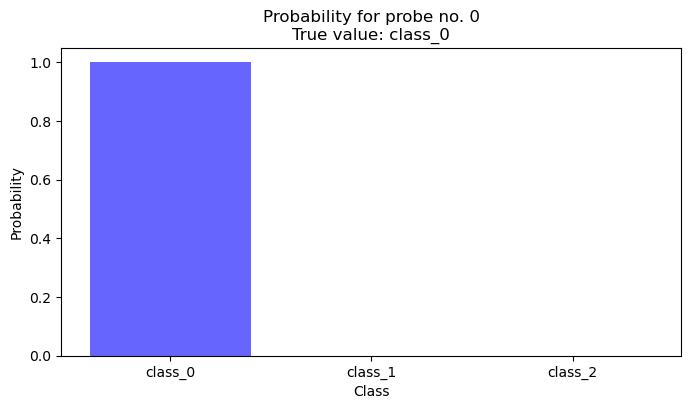

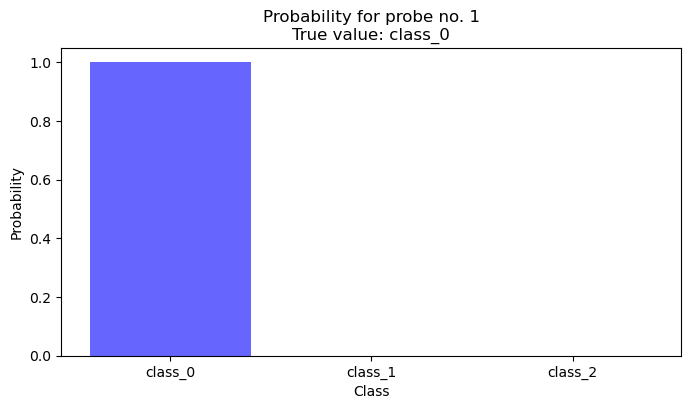

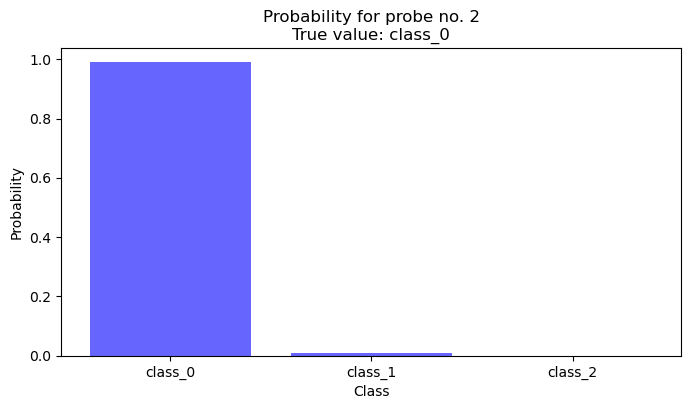

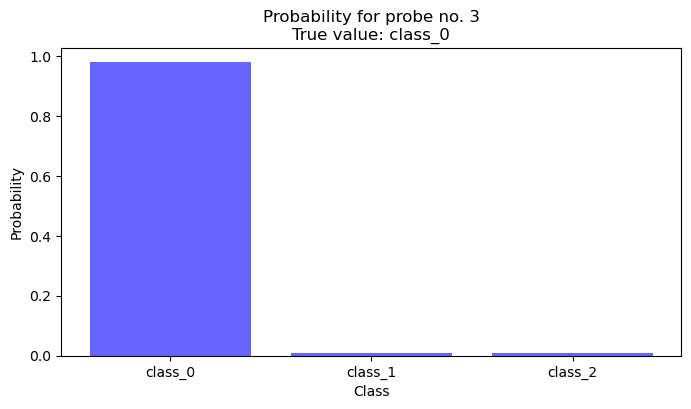

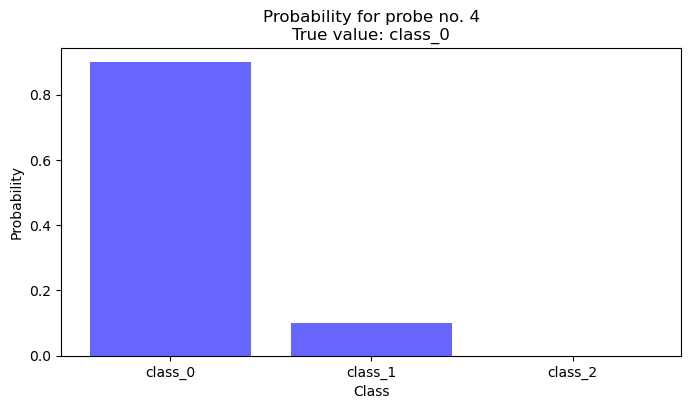

GradientBoostingClassifier()


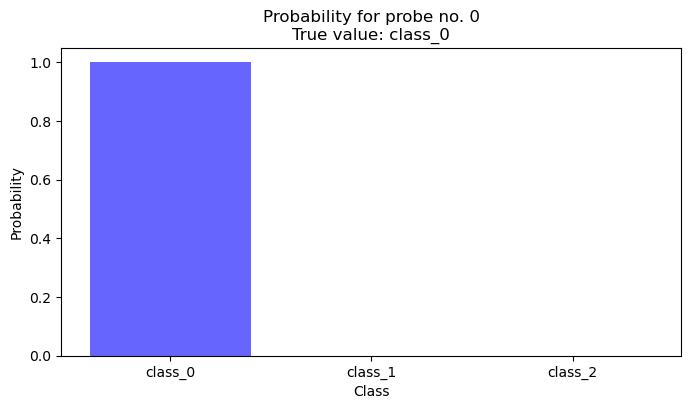

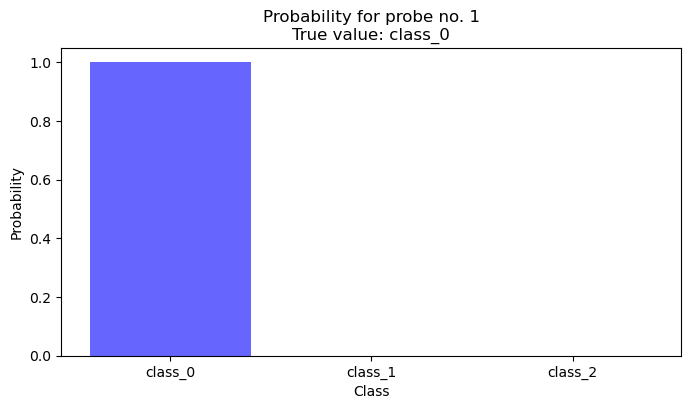

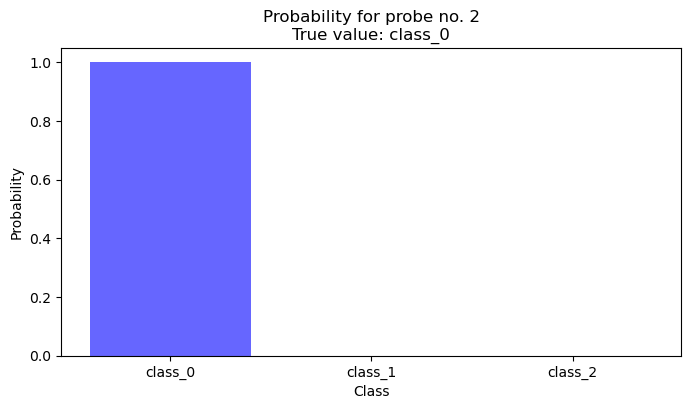

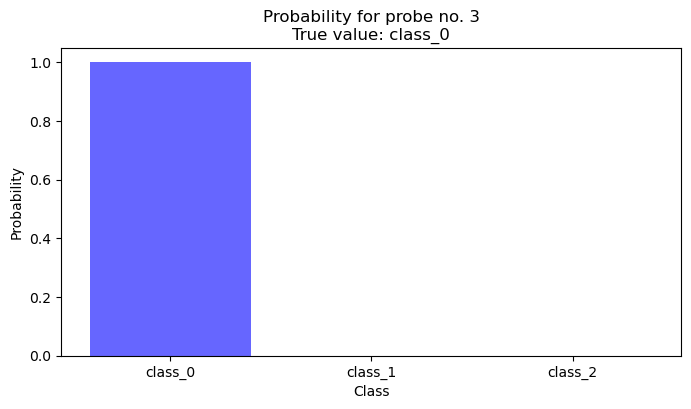

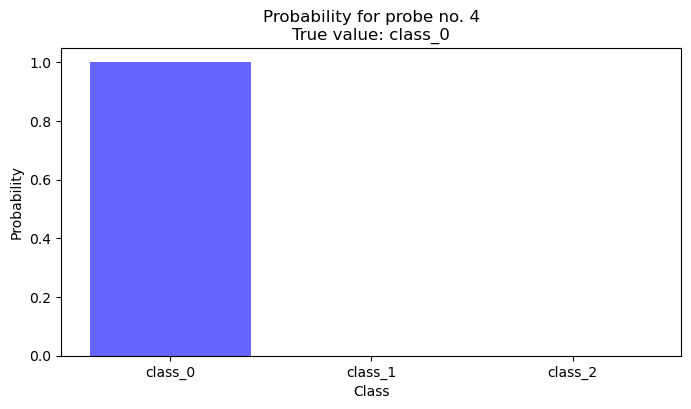

LogisticRegression(max_iter=2500)


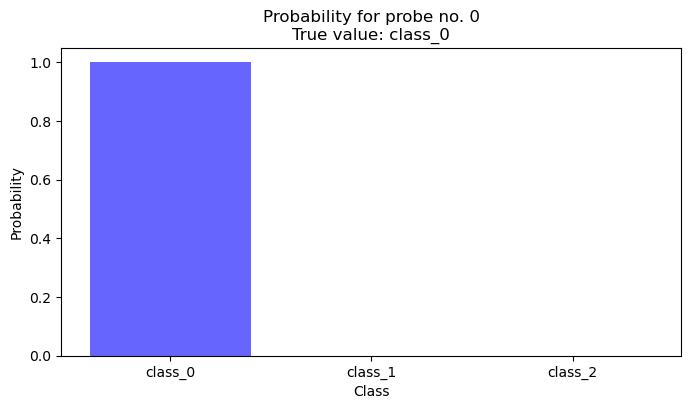

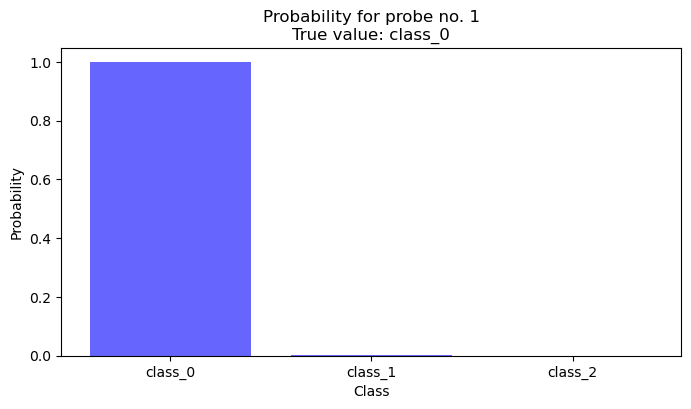

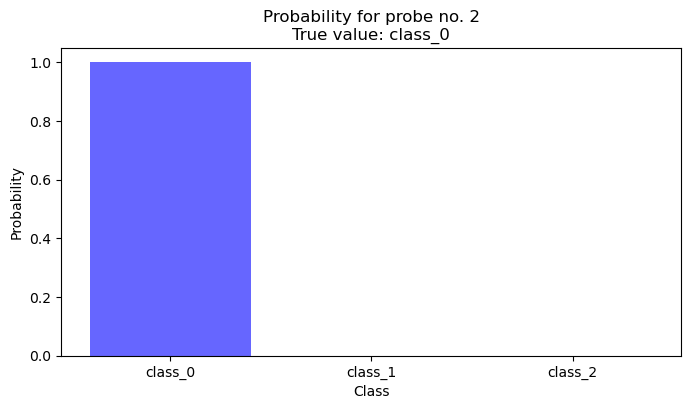

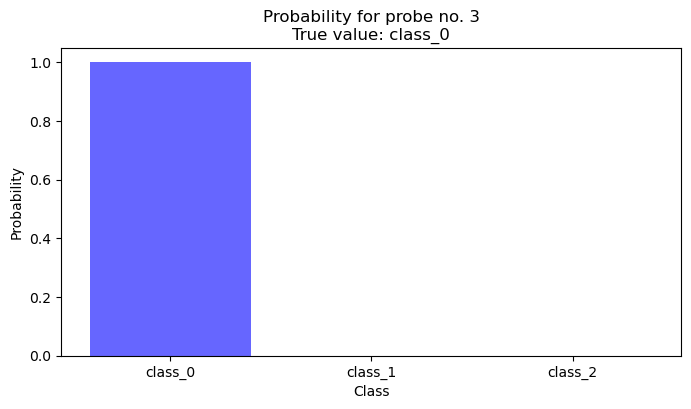

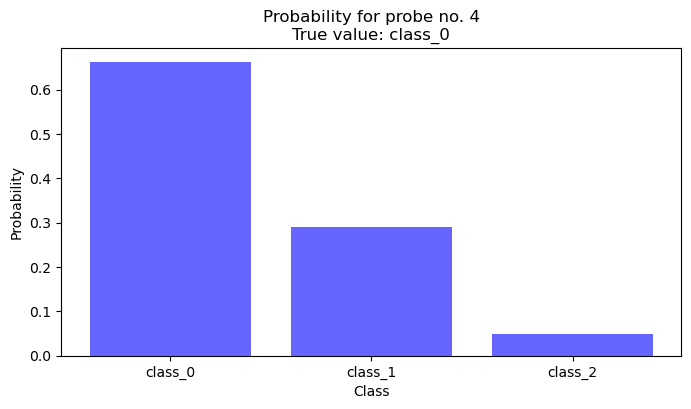

SVC(probability=True)


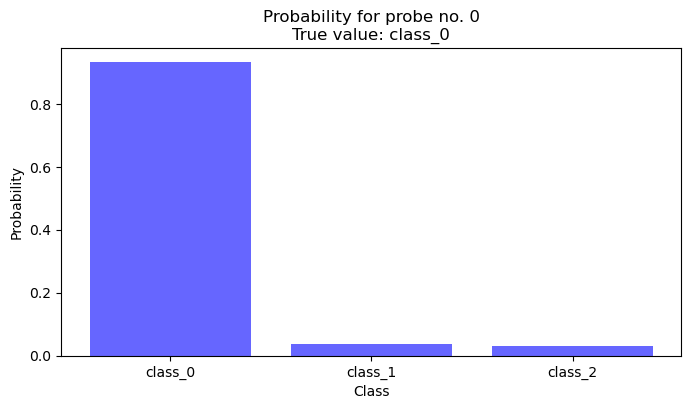

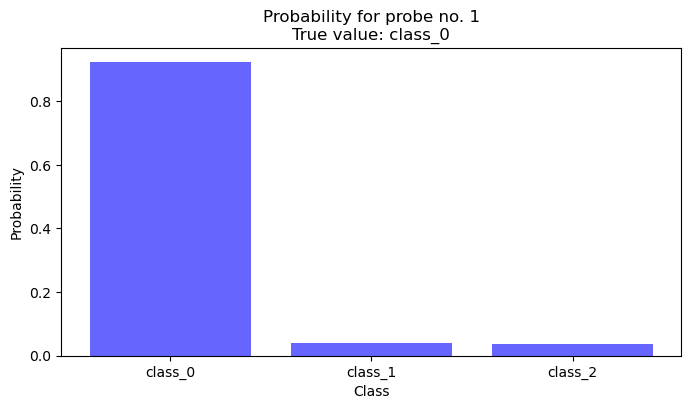

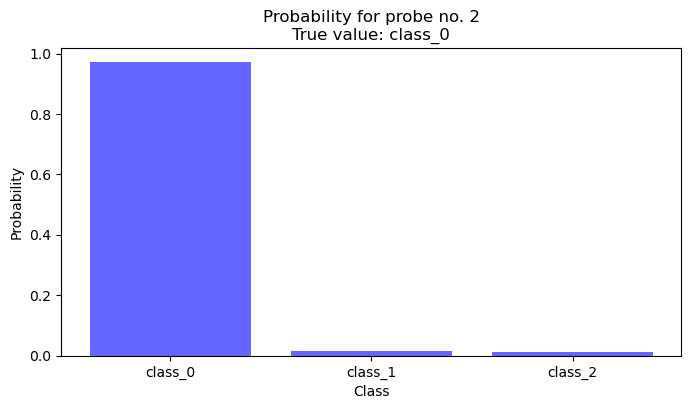

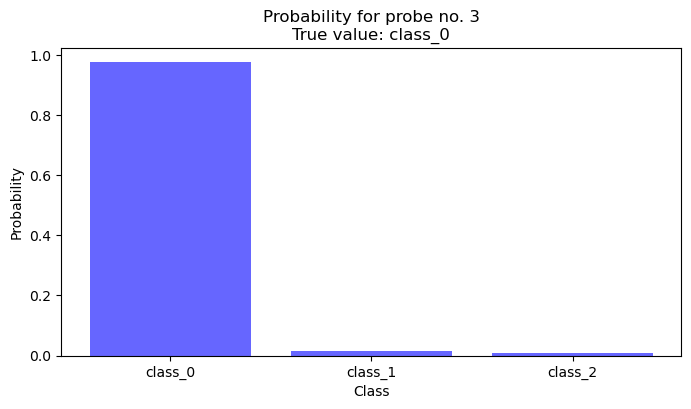

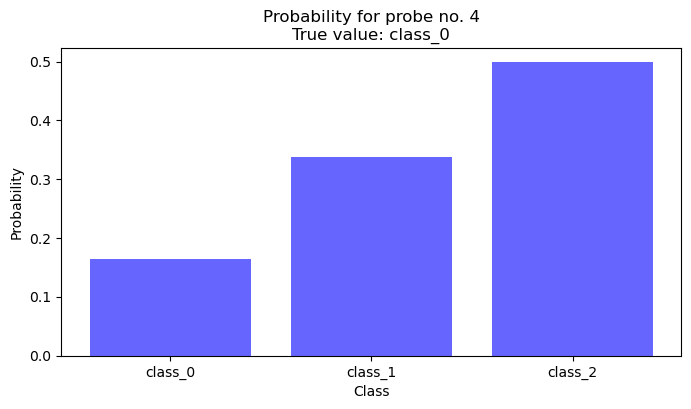

In [232]:
for model in models:
  print(model.get('model'))
  plot_confidence(model.get('predictions')[:5], y[:5], class_names)

final model


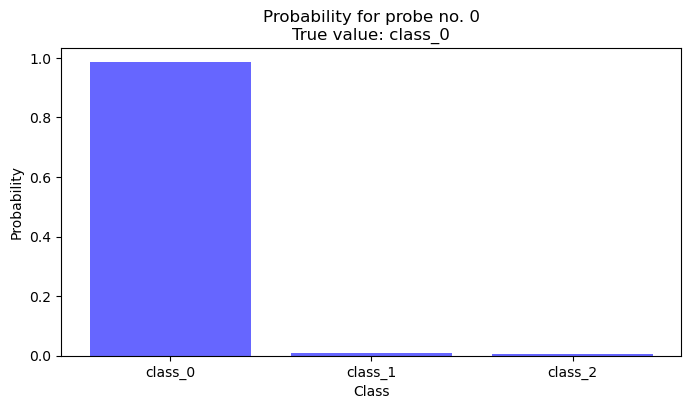

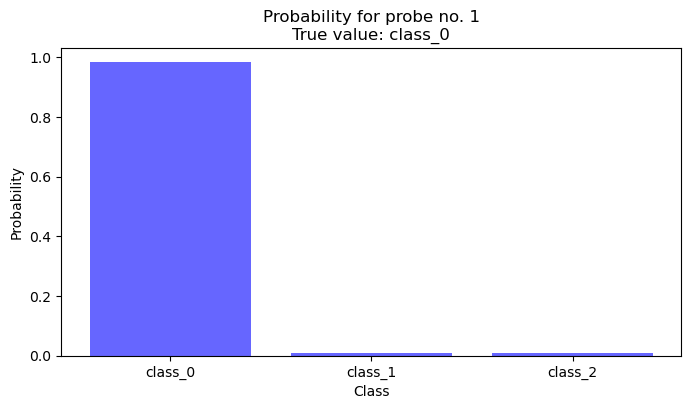

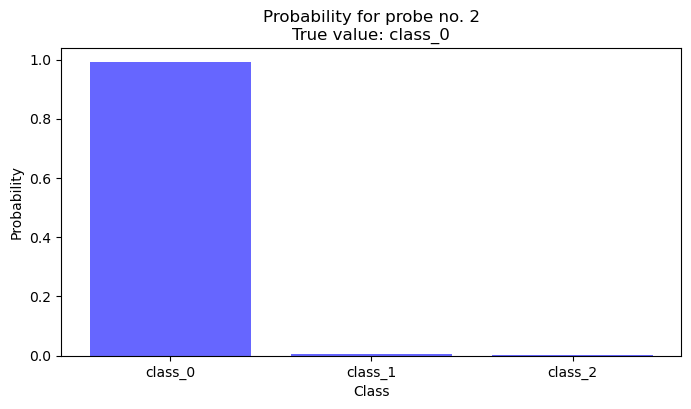

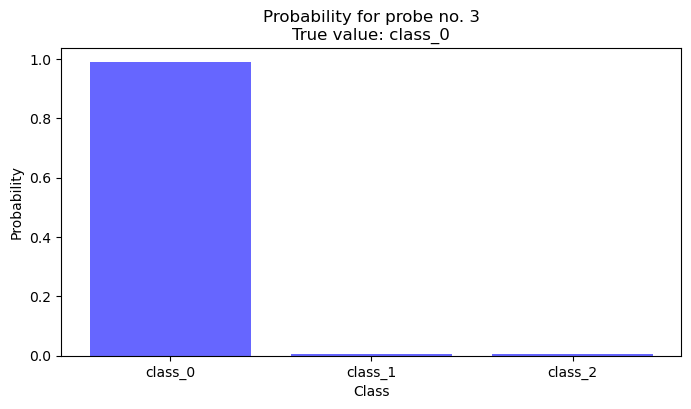

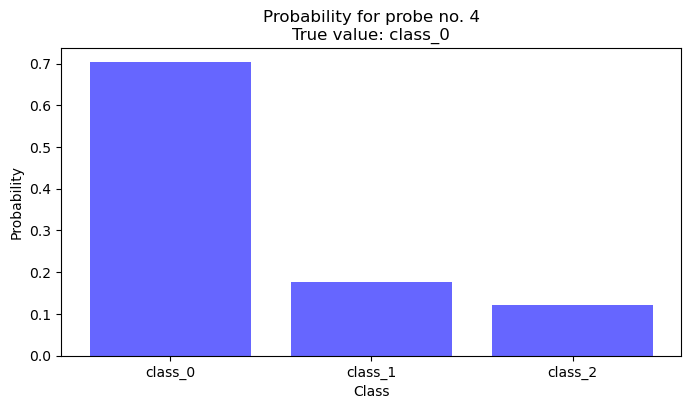

In [230]:
print('final model')
plot_confidence(final[:5], y[:5], class_names)